In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import folium
import geopandas as gpd

In [2]:
#Describe Dataset here
filename = 'data\zillow\MortgageRateConventionalFixed.csv'
mortgage_rates_src = pd.read_csv(filename)

#Describe Dataset here
filename = 'data\zillow\Affordability_Wide_2019Q2_Public.csv'
affordability_index_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Describe Dataset here
filename = 'data\zillow\Affordability_Income_2018Q4.csv'
affordability_income_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Rental Price - Single Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Sfr.csv'
median_rental_price_sfr_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price Per Square Foot - Single Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Sfr.csv'
median_rental_price_sfr_sqft_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPrice_Mfr5Plus.csv'
median_rental_price_mfr_src = pd.read_csv(filename,skipinitialspace=True)

#Median Rental Price Per Square Foot - Multi-Family Residence
filename = 'data\zillow\City_MedianRentalPricePerSqft_Mfr5Plus.csv'
median_rental_price_mfr_sqft_src = pd.read_csv(filename,skipinitialspace=True)

#Rental Index Per Square Foot - All Homes
filename = 'data\zillow\City_ZriPerSqft_AllHomes.csv'
rental_index_all_sqft_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Value - All Homes
filename = 'data\zillow\City_Zhvi_AllHomes.csv'
median_value_all_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Median Value Per Square Foot - All Homes
filename = 'data\zillow\City_MedianValuePerSqft_AllHomes.csv'
median_value_all_sqft_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Count of Home Sales
filename = 'data\zillow\Sale_Counts_City.csv'
sales_count_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#rental vacancy Rate - 10 years quarterly
filename = 'data/rental_vacancy_rate_10_yrs.csv'
rental_vacancy_rate_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Unemployment Rate - 20 years 
filename = 'data/unemployment_rate_20_years.csv'
unemployment_rate_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

#Unemployment Rate - by state 
filename = 'data/unemployment_rate_by_state.csv'
unemployment_rate_state_src = pd.read_csv(filename,encoding='latin-1',skipinitialspace=True)

housing_crash_date = ['2008','12']
state_geo = 'data/folium/us-states.json'


In [3]:
#build state name / id xref
with open(state_geo) as json_file:
    state_geo_df = json.load(json_file)
state_geo_xref = json_normalize(state_geo_df['features']).filter(items=['id','properties.name'])
state_geo_xref = state_geo_xref.rename(columns={'id':'State_id','properties.name':'State'}).set_index('State')
state_geo_xref.head()

,State_id
State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


## Mortgage Rates - Monthly

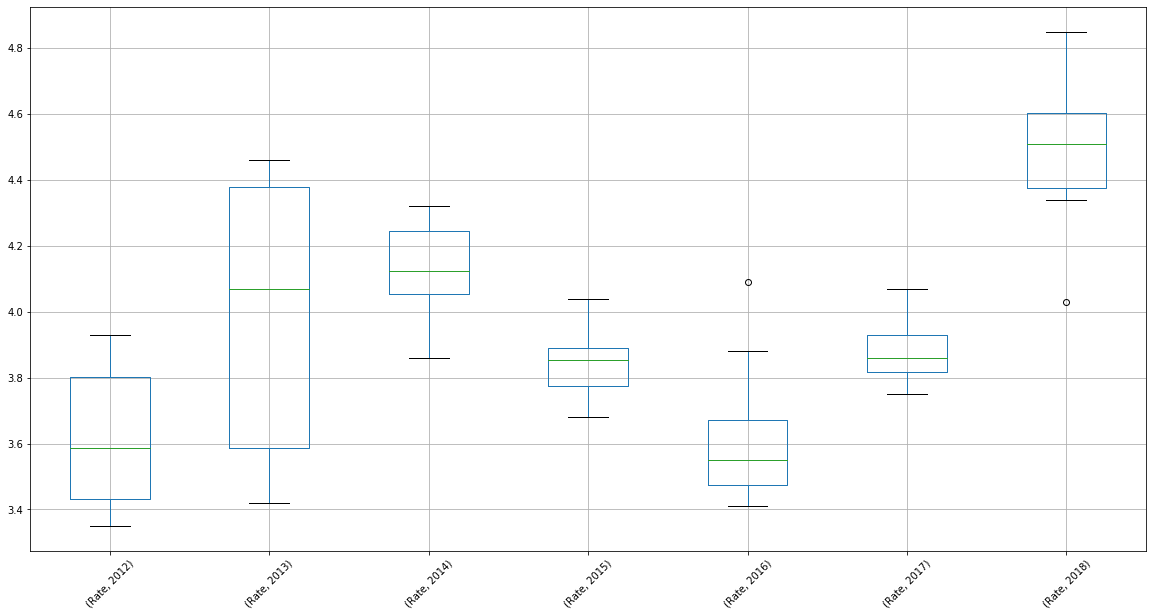

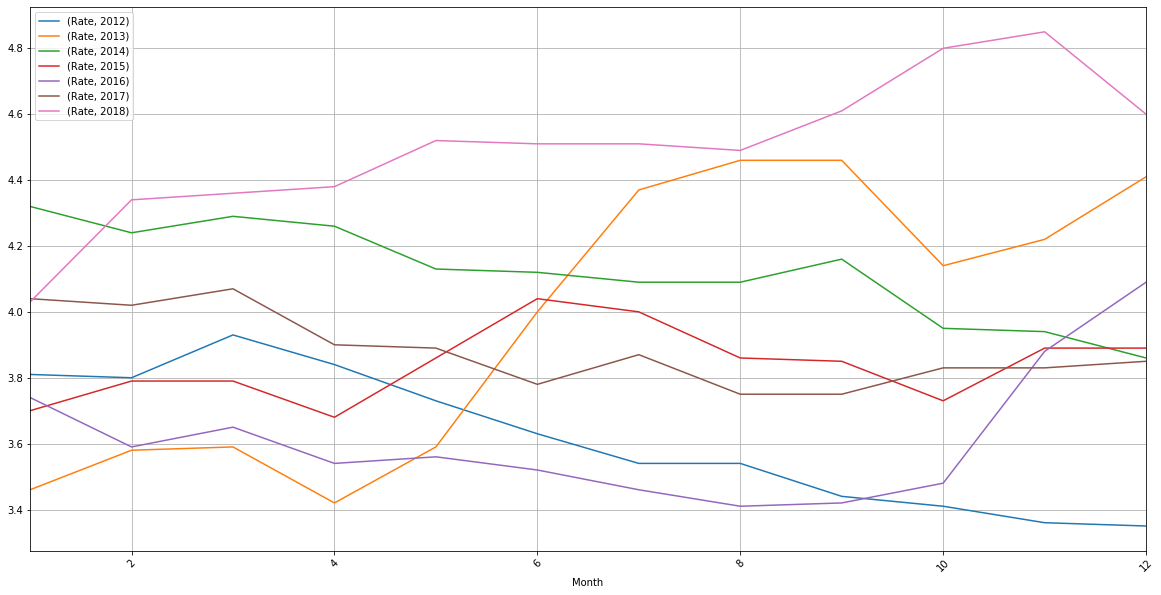

Rate                                    
Year   2012  2013  2014  2015  2016  2017  2018
Month                                          
1      3.81  3.46  4.32  3.70  3.74  4.04  4.03
2      3.80  3.58  4.24  3.79  3.59  4.02  4.34
3      3.93  3.59  4.29  3.79  3.65  4.07  4.36
4      3.84  3.42  4.26  3.68  3.54  3.90  4.38
5      3.73  3.59  4.13  3.86  3.56  3.89  4.52

In [4]:
mortgage_rates_monthly = mortgage_rates_src.copy()
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='TimePeriod')
mortgage_rates_monthly = mortgage_rates_monthly.rename(columns={'MortgageRateConventionalFixed':'Rate'})
mortgage_rates_monthly['Date'] = pd.to_datetime(mortgage_rates_monthly['Date'], format='%Y-%m-%d')
mortgage_rates_monthly['Year'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).year
mortgage_rates_monthly['Month'] = pd.DatetimeIndex(mortgage_rates_monthly['Date']).month
mortgage_rates_monthly = mortgage_rates_monthly.drop(columns='Date')
mortgage_rates_monthly = mortgage_rates_monthly[['Year','Month','Rate']]
mortgage_rates_monthly = mortgage_rates_monthly.groupby(['Year','Month']).median()
mortgage_rates_monthly = mortgage_rates_monthly.unstack(level=0).dropna(how='any',axis=1)
#Let's thorw up a quick plot to see change over time by Size / period

title = 'Mortgage Rates - Monthly BoxPlot'
mortgage_rates_monthly.plot.box(rot=45, grid=True, figsize=(20,10))
plt.savefig(f'{title}.png')

title = 'Mortgage Rates - Monthly'
mortgage_rates_monthly.plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.savefig(f'{title}.png')
plt.show()


mortgage_rates_monthly.head()

## Affordability Index - Monthly
>**pti** - Price To Income Index <br>
**mga** - Mortgage Affordability Index <br>
**rta** - Rent Affordability Index <br>

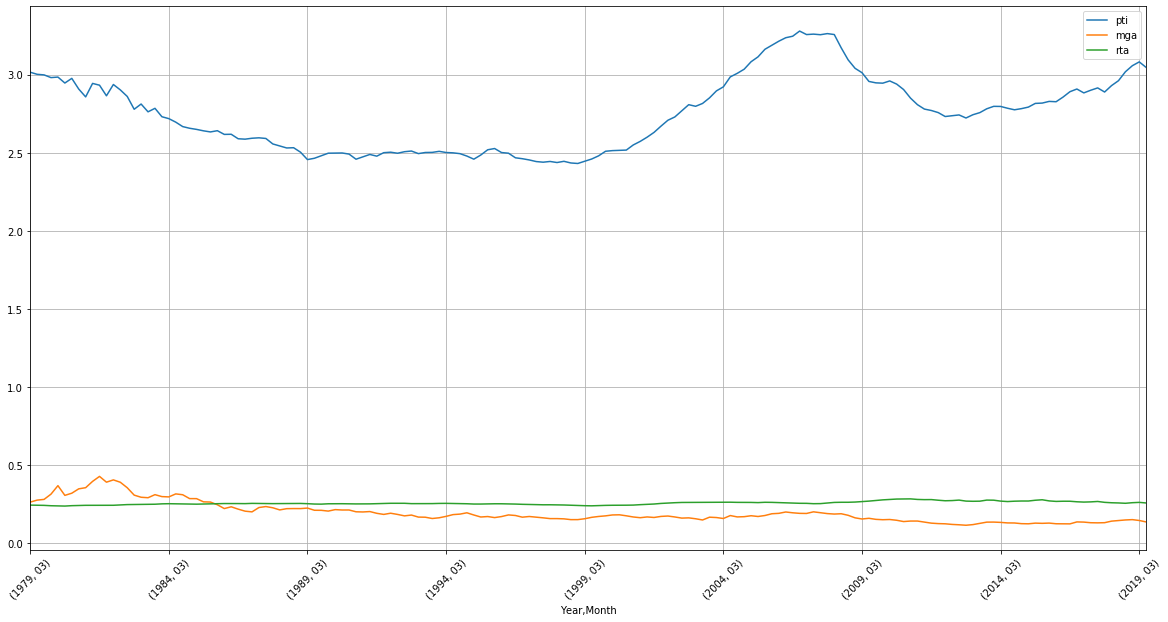

Year                                                                                                           1979  \
Month                                                                                                            03   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.928344   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.019673   
                 IL   Chicago                        394463   Chicago, IL                        3         3.035758   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         3.887457   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.388489   

Year                                                                                                                 \
Month                                                                                                            06   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.956635   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.141217   
                 IL   Chicago                        394463   Chicago, IL                        3         3.045651   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.025835   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.387368   

Year                                                                                                                 \
Month                                                                                                            09   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.966927   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.208146   
                 IL   Chicago                        394463   Chicago, IL                        3         2.984501   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.101038   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.389267   

Year                                                                                                                 \
Month                                                                                                            12   
Index           State City                           RegionID RegionName                         SizeRank             
Price To Income  NY   New York                       394913   New York, NY                       1         2.961860   
                 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         4.278269   
                 IL   Chicago                        394463   Chicago, IL                        3         2.973171   
                 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         4.130605   
                 PA   Philadelphia                   394974   Philadelphia, PA                   5         2.398643   

Year                                                                                                           1980  \
Month                                                                

In [5]:
affordability_index = affordability_index_src.copy()
affordability_index['State'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_index['City'] = affordability_index["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
affordability_index = affordability_index.drop(columns='HistoricAverage_1985thru1999')
affordability_index_us = affordability_index.query('City == "United States"')
affordability_index = affordability_index[~affordability_index['City'].str.contains("United States")]
affordability_index.set_index(['Index','State','City','RegionID','RegionName','SizeRank'],inplace=True)
affordability_index.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_index.columns],names=['Year','Month'])
affordability_index = affordability_index#.stack(level=1)

# quick chart
affordability_index.query("Index == 'Price To Income'").median().plot(rot=45, grid=True, label='pti')
affordability_index.query("Index == 'Mortgage Affordability'").median().plot(rot=45, grid=True, label='mga')
affordability_index.query("Index == 'Rent Affordability'").median().plot(rot=45, grid=True, label='rta', figsize=(20,10))

plt.legend(loc='best')
plt.show()

affordability_index.head()

## Median Income - Quarterly

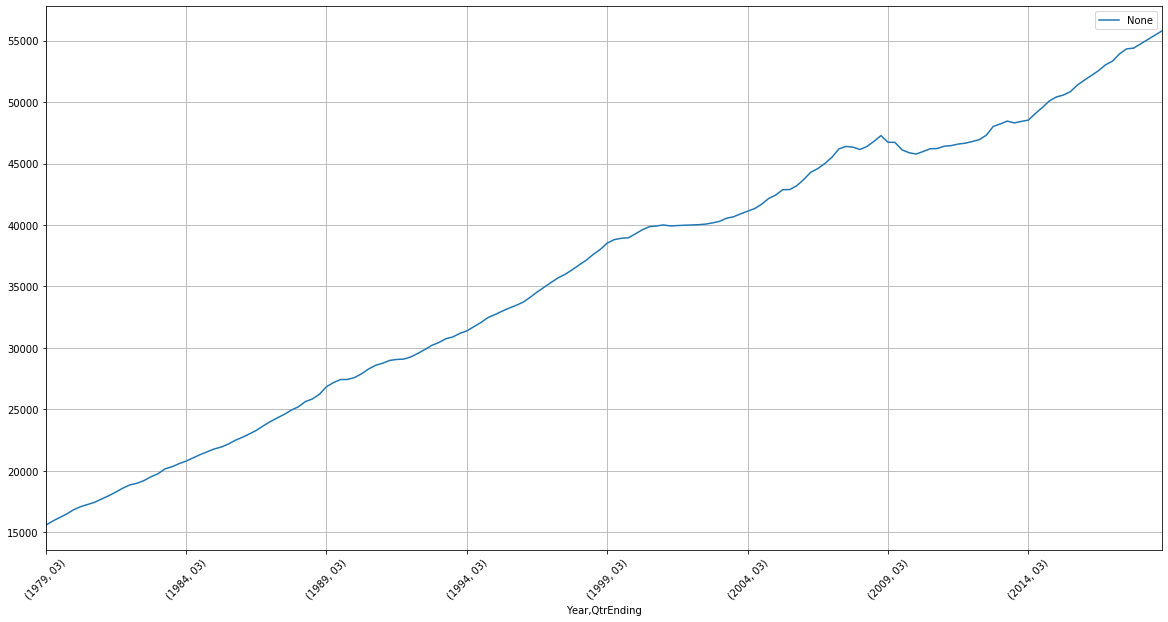

Year                                                                                           1979  \
QtrEnding                                                                                        03   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         17536.34   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         17913.83   
 IL   Chicago                        394463   Chicago, IL                        3         20056.35   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18147.33   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         17530.66   

Year                                                                                                 \
QtrEnding                                                                                        06   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         17888.75   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         18285.02   
 IL   Chicago                        394463   Chicago, IL                        3         20460.12   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18458.77   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         17869.90   

Year                                                                                                 \
QtrEnding                                                                                        09   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         18255.17   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         18746.27   
 IL   Chicago                        394463   Chicago, IL                        3         20910.06   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         18899.16   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         18248.18   

Year                                                                                                 \
QtrEnding                                                                                        12   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         18614.93   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         19213.79   
 IL   Chicago                        394463   Chicago, IL                        3         21267.37   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4         19454.80   
 PA   Philadelphia                   394974   Philadelphia, PA                   5         18589.76   

Year                                                                                           1980  \
QtrEnding                                                                                        03   
State City                           RegionID RegionName                         SizeRank             
 NY   New York                       394913   New York, NY                       1         19075.72   
 CA   Los Angeles-Long Beach-Anaheim 753899   Los Angeles-Long Beach-Anaheim, CA 2         19782.36   
 IL   Chicago                        394463   Chicago, IL                        3         21678.20   
 TX   Dallas-Fort Worth              394514   Dallas-Fort Worth, TX              4

In [6]:
affordability_income = affordability_income_src.copy()
affordability_income['State'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
affordability_income['City'] = affordability_income["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#affordability_income = affordability_income.drop(columns=['RegionName','RegionID','SizeRank'])
affordability_income_us = affordability_income.query('City == "United States"')
affordability_income = affordability_income[~affordability_income['City'].str.contains("United States")]
affordability_income.set_index(['State','City','RegionID','RegionName','SizeRank'],inplace=True)
affordability_income.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in affordability_income.columns],names=['Year','QtrEnding'])
affordability_income = affordability_income#.stack(level=0)

affordability_income.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

affordability_income.head()

## Median Rental Price - Single Family Residence

In [ ]:
median_rental_price_sfr = median_rental_price_sfr_src.copy()
#median_rental_price_sfr['State'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_sfr['City'] = median_rental_price_sfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_sfr = median_rental_price_sfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sfr_us = median_rental_price_sfr.query('City == "United States"')
#median_rental_price_sfr = median_rental_price_sfr[~median_rental_price_sfr['City'].str.contains("United States")]
median_rental_price_sfr.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr.columns],names=['Year','Month'])
median_rental_price_sfr = median_rental_price_sfr#.stack(level=0)

median_rental_price_sfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_sfr.head()

## Median Rental Price Per Square Foot - Single Family Residence

In [ ]:
median_rental_price_sfr_sqft = median_rental_price_sfr_sqft_src.copy()
#median_rental_price_sfr_sqft['State'] = median_rental_price_sfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_sfr_sqft['City'] = median_rental_price_sfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft.query('City == "United States"')
#median_rental_price_sfr_sqft = median_rental_price_sfr_sqft[~median_rental_price_sfr['City'].str.contains("United States")]
median_rental_price_sfr_sqft.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_sfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_sfr_sqft.columns],names=['Year','Month'])
median_rental_price_sfr_sqft = median_rental_price_sfr_sqft#.stack(level=0)

median_rental_price_sfr_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_sfr_sqft.head()

## Median Rental Price - Multi Family Residence

In [ ]:
median_rental_price_mfr = median_rental_price_mfr_src.copy()
#median_rental_price_mfr['State'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_mfr['City'] = median_rental_price_mfr["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_mfr = median_rental_price_mfr.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_mfr = median_rental_price_mfr.query('City == "United States"')
#median_rental_price_mfr = median_rental_price_mfr[~median_rental_price_mfr['City'].str.contains("United States")]
median_rental_price_mfr.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_mfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr.columns],names=['Year','Month'])
median_rental_price_mfr = median_rental_price_mfr#.stack(level=0)

median_rental_price_mfr.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_mfr.head()

## Median Rental Price Per Square Foot - Multi Family Residence

In [ ]:
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft_src.copy()
#median_rental_price_mfr_sqft['State'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_rental_price_mfr_sqft['City'] = median_rental_price_mfr_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft.query('City == "United States"')
#median_rental_price_mfr_sqft = median_rental_price_mfr_sqft[~median_rental_price_mfr_sqft['City'].str.contains("United States")]
median_rental_price_mfr_sqft.set_index(['State','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_rental_price_mfr_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_rental_price_mfr_sqft.columns],names=['Year','Month'])
median_rental_price_mfr_sqft = median_rental_price_mfr_sqft#.stack(level=0)

median_rental_price_mfr_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_rental_price_mfr_sqft.head()

## Rental Index Per Square Foot - All Homes

In [ ]:
rental_index_all_sqft = rental_index_all_sqft_src.copy()
#rental_index_all_sqft['State'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#rental_index_all_sqft['City'] = rental_index_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#rental_index_all_sqft = rental_index_all_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#rental_index_all_sqft = rental_index_all_sqft.query('City == "United States"')
#rental_index_all_sqft = rental_index_all_sqft[~rental_index_all_sqft['City'].str.contains("United States")]
rental_index_all_sqft.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
rental_index_all_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in rental_index_all_sqft.columns],names=['Year','Month'])
rental_index_all_sqft = rental_index_all_sqft#.stack(level=0)

rental_index_all_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

rental_index_all_sqft.head()

## Median Value - All Homes - Monthly

In [ ]:
median_value_all = median_value_all_src.copy()
#median_value_all['State'] = median_value_all["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_value_all['City'] = median_value_all["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_value_all = median_value_all.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_value_all = median_value_all.query('City == "United States"')
#median_value_all = median_value_all[~median_value_all['City'].str.contains("United States")]
median_value_all.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_value_all.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_value_all.columns],names=['Year','Month'])
median_value_all = median_value_all#.stack(level=0)

median_value_all.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

median_value_all.head()

## Median Value Per Square Foot - All Homes - Monthly

In [ ]:
median_value_all_sqft = median_value_all_sqft_src.copy()
#median_value_all_sqft['State'] = median_value_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#median_value_all_sqft['City'] = median_value_all_sqft["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#median_value_all_sqft = median_value_all_sqft.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#median_value_all_sqft = median_value_all_sqft.query('City == "United States"')
#median_value_all_sqft = median_value_all_sqft[~median_value_all_sqft['City'].str.contains("United States")]
median_value_all_sqft.set_index(['State','RegionID','RegionName','Metro','CountyName','SizeRank'],inplace=True)
median_value_all_sqft.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in median_value_all_sqft.columns],names=['Year','Month'])
median_value_all_sqft = median_value_all_sqft#.stack(level=0)


#conv = np.vectorize(mdates.strpdate2num('%Y-%m'))
title = 'Median Value Per Square Foot - All Homes - Monthly'
ax = median_value_all_sqft.median().plot(rot=45, grid=True, figsize=(20,10))
ax.axvline(dt.datetime(2008, 12, 21))
ax.set_title(f'{title}')

plt.legend(loc='best')
plt.show()

median_value_all_sqft.head()

In [ ]:
sales_count = sales_count_src.copy()
#sales_count['State'] = sales_count["RegionName"].apply(lambda x: "".join(x.split(',')[1:]))
#sales_count['City'] = sales_count["RegionName"].apply(lambda x: "".join(x.split(',')[0]))
#sales_count = sales_count.drop(columns=['RegionName','Metro','CountyName','SizeRank']).dropna(how='all')
#sales_count = sales_count.query('City == "United States"')
#sales_count = sales_count[~sales_count['City'].str.contains("United States")]
sales_count.set_index(['StateName','RegionID','RegionName','SizeRank'],inplace=True)
sales_count.columns = pd.MultiIndex.from_tuples([tuple(c.split('-'))for c in sales_count.columns],names=['Year','Month'])
sales_count = sales_count#.stack(level=0)

sales_count.median().plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

sales_count.head()

In [ ]:
rental_vacancy_rate_quartely = rental_vacancy_rate_src
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.rename(columns={'RRVRUSQ156N':'Rate'})
rental_vacancy_rate_quartely['Date'] = pd.to_datetime(rental_vacancy_rate_quartely['DATE'], format='%Y-%m-%d')
rental_vacancy_rate_quartely['Year'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).year
rental_vacancy_rate_quartely['Month'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).month
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.drop(columns='Date')
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely[['Year','Month','Rate']]
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+

#Let's thorw up a quick plot to see change over time by Size / period
rental_vacancy_rate_quartely.plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

rental_vacancy_rate_quartely.head()

In [ ]:
unemployment_rate_monthly = unemployment_rate_src
unemployment_rate_monthly = unemployment_rate_monthly.rename(columns={'LNS14000024':'Rate'})
unemployment_rate_monthly['Date'] = pd.to_datetime(unemployment_rate_monthly['DATE'], format='%Y-%m-%d')
unemployment_rate_monthly['Year'] = pd.DatetimeIndex(unemployment_rate_monthly['DATE']).year
unemployment_rate_monthly['Month'] = pd.DatetimeIndex(unemployment_rate_monthly['DATE']).month
unemployment_rate_monthly = unemployment_rate_monthly.drop(columns='Date')
unemployment_rate_monthly = unemployment_rate_monthly[['Year','Month','Rate']]
unemployment_rate_monthly = unemployment_rate_monthly.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+

#Let's thorw up a quick plot to see change over time by Size / period

mortgage_rates_monthly.plot.box(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

unemployment_rate_monthly.head()

In [ ]:
rental_vacancy_rate_quartely = rental_vacancy_rate_src
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.rename(columns={'RRVRUSQ156N':'Rate'})
rental_vacancy_rate_quartely['Date'] = pd.to_datetime(rental_vacancy_rate_quartely['DATE'], format='%Y-%m-%d')
rental_vacancy_rate_quartely['Year'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).year
rental_vacancy_rate_quartely['Month'] = pd.DatetimeIndex(rental_vacancy_rate_quartely['DATE']).month
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.drop(columns='Date')
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely[['Year','Month','Rate']]
rental_vacancy_rate_quartely = rental_vacancy_rate_quartely.groupby(['Year','Month']).median()
#mortgage_rates_monthly = mortgage_rates_monthly.set_index('Date').dropna(how='any')
#mortgage_rates_monthly = mortgage_rates_monthly.groupby(pd.Grouper(freq='M')).median().reset_index()  # update for v0.21+

#Let's thorw up a quick plot to see change over time by Size / period

mortgage_rates_monthly.plot(rot=45, grid=True, figsize=(20,10))
rental_vacancy_rate_quartely.plot(rot=45, grid=True, figsize=(20,10))
plt.legend(loc='best')
plt.show()

rental_vacancy_rate_quartely.head()

## Median Income (all time) by State

In [7]:
affordability_income_map_median = affordability_income.copy()
affordability_income_map_median = affordability_income_map_median.groupby('State').median()
#affordability_income_map_drop = affordability_income_map.copy()
affordability_income_map_median.columns = affordability_income_map_median.columns.droplevel(1)
affordability_income_map_median = pd.DataFrame(affordability_income_map_median.median(axis=1))
affordability_income_map_median.columns = ['MedianIncome']
affordability_income_map_median = affordability_income_map_median.reset_index()
affordability_income_map_median['State'] = affordability_income_map_median['State'].str.strip()

#render the map
map_name = 'MedianIncome ($)'
m = folium.Map([43, -100], zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    data=affordability_income_map_median,
    columns=['State', 'MedianIncome'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=map_name
).add_to(m)


m.save(map_name+'.html')

m

In [8]:
unemployment_rate_state = unemployment_rate_state_src.set_index('State').merge(state_geo_xref,left_index=True,right_index=True)

years = [col for col in unemployment_rate_state.loc[:, unemployment_rate_state.columns != 'State_id']]


#render the map
map_name = 'Unemployment Rate (%)'
m = folium.Map([43, -100], zoom_start=4)

for year in years:
    year = folium.Choropleth(
    geo_data=state_geo,
    data=pd.DataFrame(unemployment_rate_state[[year,'State_id']]),
    columns=['State_id', year],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= f'{year} - {map_name}',
    overlay=True,
    name = year
    )
    m.add_child(year)

m.add_child(folium.LayerControl())
m.save(map_name+'.html')

m



In [10]:
unemployment_rate_state = unemployment_rate_state_src.copy()
unemployment_rate_state = unemployment_rate_state.groupby('State').median()
##affordability_income_map_drop = affordability_income_map.copy()
##unemployment_rate_state.columns = unemployment_rate_state.columns.droplevel(1)

unemployment_rate_state = pd.DataFrame(unemployment_rate_state.median(axis=1))
#unemployment_rate_state.columns = ['Unemployment']
#unemployment_rate_state = unemployment_rate_state.reset_index()

##unemployment_rate_state['State'] = unemployment_rate_state['State'].str.strip()

#unemployment_rate_state = unemployment_rate_state.set_index('State').merge(state_geo_xref,left_index=True,right_index=True)


#render the map
map_name = 'Unemployment Rate (%)'
m = folium.Map([43, -100], zoom_start=4)



year1 = folium.Choropleth(
    geo_data=state_geo,
    data=unemployment_rate_state,
    columns=['State_id', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=map_name,
    name = 'testy'
)#.add_to(m)
m.add_child(year1)
m.add_child(folium.LayerControl())
m.save(map_name+'.html')

m

KeyError: "None of ['State_id'] are in the columns"